In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/audreygregoria/datax/1d271646cc8ac3fa54fb0a7fc5020241906f2bad/data_prototype2.csv')
mean, std = df.floorPrice.mean(), df.floorPrice.std()
df=df[np.abs((df.floorPrice - mean) <= 2*std)]
maxx, minn = np.max(df.floorPrice), np.min(df.floorPrice)
s=list(df["floorPrice"])

from scipy import stats
#df["floorPrice"] = np.abs(stats.zscore(df['floorPrice']))
def ou(o):
      #o=str(int(o))
      #s=str(o)
      #ss=str(o[0])+str("0")*(len(s)-1)
      return o/1e+4

df=df.fillna(df.mean())
df['instagram']=df['instagram'].apply(ou)
df['twitter']=df['twitter'].apply(ou)
df['discord']=df['discord'].apply(ou)
df['opensea']=df['opensea'].apply(ou)
df['volumeCount']=df['volumeCount'].apply(ou)

x_df=df.iloc[:,:-1]
y_df=df["floorPrice"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
pop=y_train

In [ ]:
from sklearn.linear_model import Lasso

alpha=0.00005
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
y_train = np.array((y_train - minn)/(maxx-minn)) #np.array((y_train - mean)/std)
y_test = np.array((y_test - minn)/(maxx-minn)) #np.array((y_test - mean)/std) #np.array(stats.zscore(y_test))
lasso_regr.fit(X_train, y_train)
y_pred=lasso_regr.predict(X_test)
a=pd.DataFrame(X_test)
b=pd.DataFrame(y_pred)
import sklearn
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.00863951032810568

0.8990890855659428

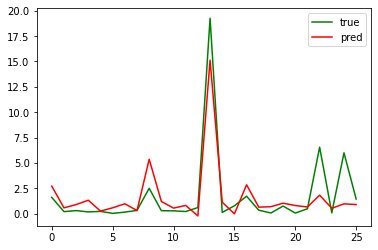

In [ ]:
ytest_1 = np.empty(y_test.shape)
for i in range(len(y_test)):
    ytest_1[i]=y_test[i]*(maxx-minn) + minn # y_test[i]*std+mean


ypred_1 = np.empty(y_test.shape)
for i in range(len(y_pred)):
    #st=pop.std()
    #mn=pop.mean()
    ypred_1[i]=y_pred[i]*(maxx-minn) + minn #y_pred[i]*std+mean

plt.plot(np.arange(y_test.shape[0]), ytest_1, color='g', label='true')
plt.plot(np.arange(y_test.shape[0]), ypred_1, color='r', label = 'pred')
plt.legend()
r=np.corrcoef(ytest_1, ypred_1)
r[0,1]

In [ ]:
import joblib

# Save the model as a pickle in a file
joblib.dump(lasso_regr, 'model.pkl')

# Load the model from the file
knn_from_joblib = joblib.load('model.pkl')

# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)


array([ 0.14048711,  0.02964016,  0.04633547,  0.06859337,  0.01296698,
        0.02992697,  0.05051734,  0.01553732,  0.27821438,  0.06231795,
        0.02826246,  0.04193718, -0.0116574 ,  0.78604791,  0.0585221 ,
       -0.00088086,  0.14760907,  0.03319346,  0.03548723,  0.05350445,
        0.04162527,  0.03390034,  0.09451298,  0.02742675,  0.05009944,
        0.04650682])

In [ ]:
def ou(o):
      return o/1e+4

In [ ]:
!pip install anvil-uplink
import anvil.server
anvil.server.connect('server_57AQBXHXBXQB3SV63LDEGSMA-UP4OJMY33G3H35TG')

@anvil.server.callable
def predict(instagram, twitter, discord, opensea, volumeCount): 
    s = [instagram, twitter, discord, opensea, volumeCount]
    for i in range(len(s)):
      s[i]=ou(s[i])
    po=knn_from_joblib.predict(np.array(s).reshape(1, -1))
    ans=po*(maxx-minn) + minn
    price = ans[0]
    return price

     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 145 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=b0729e5b5de23fa3f3010c39d5fa28bbe06df4090f0af649b8d5800da3858f15
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


In [ ]:
predict(163528.0	,36954.0	,7675.0	,3100	,1600.0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


0.5715433462670337

In [ ]:
# Only instagram and volumecount increases floor price. 
# Does not make sense to tell user to sell more nfts(increasing volume count) so they could raise their floor price. Will only be working with instagram followers.
coeffs = lasso_regr.coef_
coeffs

array([-3.25246641e-05, -1.78021276e-03, -8.56624855e-04, -7.64248923e-02,
        5.15372014e-02])

In [ ]:
# Use model to spit out price
# If we want a 20% increase -> [predicted price (from model)] * [0.2] = [increase]
# [increase] / [0.00501408(instagram coef)] = [number of instagram followers you have to increase to achieve desired floor price]

In [ ]:
@anvil.server.callable
def rec_insta(predicted_price, desired_price):
  coeff = np.abs(coeffs[0])
  increase = desired_price - predicted_price
  num_followers = round(increase / coeff)
  return num_followers

In [ ]:
rec_insta(7, 13)

184475

In [ ]:
@anvil.server.callable
def rec_twitter(predicted_price, desired_price): 
  coeff = np.abs(coeffs[1])
  increase = desired_price - predicted_price
  num_followers = round(increase / coeff)
  return num_followers 

In [ ]:
@anvil.server.callable
def rec_discord(predicted_price, desired_price): 
  coeff = np.abs(coeffs[2])
  increase = desired_price - predicted_price
  num_followers = round(increase / coeff)
  return num_followers 

In [ ]:
@anvil.server.callable
def rec_opensea(predicted_price, desired_price): 
  coeff = np.abs(coeffs[3])
  increase = desired_price - predicted_price
  num_followers = round(increase / coeff)
  return num_followers 